In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

import os

# Functions

In [14]:
def display_image(img, title=None):
    """ Function to display an image
    Args:
        1) img - image object
        2) title - the title that will be displayed above the image
    Returns:
        None; but displays an image
    """
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [37]:
def preprocess_image_without_resize(image_path, display_img=False):
    """ Function to read an image and prepare it for garbage class prediction using a CNN model
    Args:
        1) image_path - image file path
        2) target_size - the size of the image used to train the model (the original image will be resized to this size)
        3) display_img - whether to display the read image on the screen
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB)
    
    if display_img:
        display_image(img, title=os.path.basename(image_path))
        
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [38]:
def preprocess_image(image_path, target_size=(300, 300), display_img=False):
    """ Function to read an image and prepare it for garbage class prediction using a CNN model
    Args:
        1) image_path - image file path
        2) target_size - the size of the image used to train the model (the original image will be resized to this size)
        3) display_img - whether to display the read image on the screen
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    
    if display_img:
        display_image(img, title=os.path.basename(image_path))
        
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Test 3_augmentation_garbage_classification_6_classes_model 

In [3]:
model = tf.keras.models.load_model('models/3_augmentation_garbage_classification_6_classes_model.h5')
type(model)

keras.src.engine.sequential.Sequential

In [4]:
test_dir_path = 'data/garbage_classification_6_classes/colab/test'

# Create an ImageDataGenerator for test data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=(1./255.))

# Load and preprocess test data using the generator
test_generator = test_datagen.flow_from_directory(directory=test_dir_path,
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  target_size=(300, 300),
                                                  shuffle=False)  # Set shuffle to False to maintain order

# Get the true labels for the test data
true_labels = test_generator.classes

# Get the class labels for the test data
class_labels = list(test_generator.class_indices.keys())

Found 256 images belonging to 6 classes.


In [7]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

4/4 [==============================] - 5s 1s/step
              precision    recall  f1-score   support

   cardboard       0.95      0.93      0.94        41
       glass       0.89      0.94      0.91        51
       metal       0.97      0.93      0.95        41
       paper       0.95      1.00      0.98        60
     plastic       0.96      0.94      0.95        49
       trash       1.00      0.86      0.92        14

    accuracy                           0.95       256
   macro avg       0.95      0.93      0.94       256
weighted avg       0.95      0.95      0.95       256



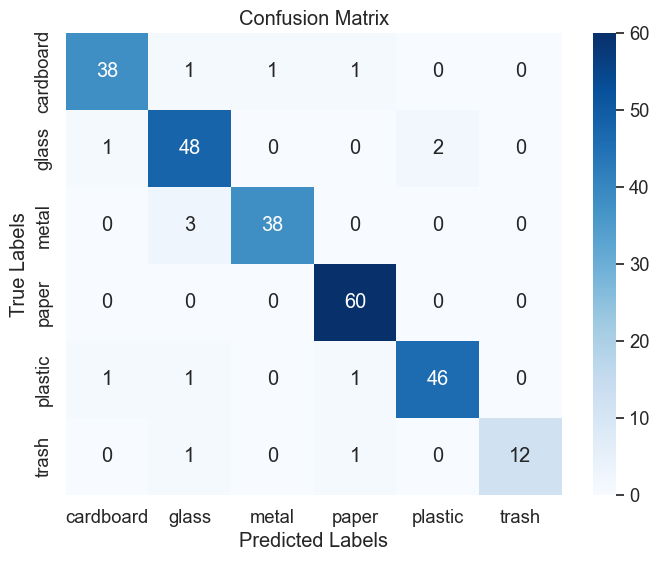

In [12]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Test model on real images

In [57]:
class_labels 

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

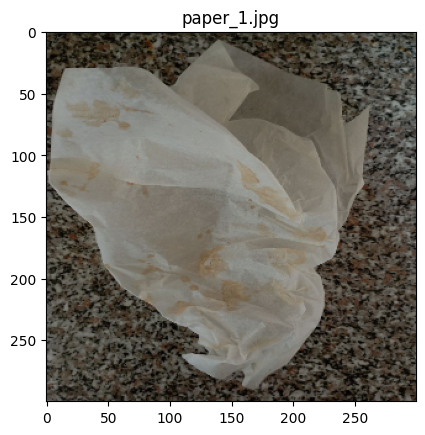

1/1 [==============================] - 0s 25ms/step

The model predicts: metal


In [56]:
plt.rcdefaults()
image_path = 'data/my_test_data/paper/paper_1.jpg'
processed_image = preprocess_image(image_path, display_img=True)

predictions = model.predict(processed_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print(f'\nThe model predicts: {predicted_class_label}')

In [58]:
predictions

array([[2.1469905e-03, 1.7723368e-03, 9.8668599e-01, 9.6185693e-07,
        9.3917688e-03, 2.0291270e-06]], dtype=float32)